# Quora Insincere Questions Classification using Bag-of-Words and TF-IDF Models

Our task is to identify which content is toxic in order to improve online communication on the Quora platform.


The dataset used for this project is sourced from the Kaggle competition titled "Quora Insincere Questions Classification."

Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification

 **Data Structure**: The dataset consists of two main columns:
  - `question_text`: The text of the question (string).
  - `target`: A binary label indicating whether the question is insincere (1) or sincere (0)


Table of Contents

1. The problem statment
2. Dataset description
3. Load and explore the dataset
4. Apply text preprocessing techniques
5. Implement the Bag of Words and TF-IDF techniques 
6. Train Logistic Regression models using BoW and TF-IDF
7. Make predictions on training and testing sets, analyze the results





## Loading and Exploring Data

In [1]:
import pandas as pd

In [2]:
# Reading data from CSV file
train_fname = 'data/quora_train.csv.zip'
raw_df = pd.read_csv(train_fname)  

In [3]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


Let's explore the data that is not toxic

In [4]:
# Filter the data where the target variable equals 0
sincere_df = raw_df[raw_df.target == 0]  

In [5]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

Now those that are toxic.

In [6]:
# Filter data for insincere entries
insincere_df = raw_df[raw_df.target == 1]  

In [7]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

Let's look at class balance in the dataset

In [8]:
raw_df.target.value_counts(normalize=True)

target
0    0.93813
1    0.06187
Name: proportion, dtype: float64

We can see that we have fewer toxic questions

### Create a working sample

Given that our dataset comprises over 1 million records, we will extract a representative sample to optimize resource utilization and facilitate more efficient analysis

In [9]:
SHORTEN = True

In [10]:
if SHORTEN:
    SAMPLE_SIZE = 100000
    raw_df = raw_df.sample(SAMPLE_SIZE, random_state=42)
else:
    SAMPLE_SIZE = len(raw_df)

## Text Preprocessing


1. Tokenization
2. Stop word removal
3. Stemming
4. Bag of Words model
5. TF-IDF model

Let's consider some examples.

In [ ]:
# Get toxic question text
q0 = sincere_df.question_text.values[1]  

In [12]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [13]:
# Get not toxic question text
q1 = raw_df[raw_df.target == 1].question_text.values[0]  

In [14]:
q1

'Is Yahoo owned by the Jews?'

### Tokenization

Tokenization is the process of breaking text into smaller units called tokens. Tokens can be individual words, phrases, or even characters.  
The goal of tokenization is to transform text into a structure that is convenient for further analysis and processing by NLP models. 
Tokenization allows each word or character to be considered as a separate unit for analysis.

We will use the `nltk` library here.


In [ ]:
'NLP is interesting!'.replace('!', '').split()

['NLP', 'is', 'fun']

In [15]:
import nltk

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Our sentence before tokenization.

In [22]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

And after

In [23]:
# Tokenize the text in the variable q0
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [24]:
q1

'Is Yahoo owned by the Jews?'

In [25]:
word_tokenize(q1)

['Is', 'Yahoo', 'owned', 'by', 'the', 'Jews', '?']

In [26]:
q0_tok = word_tokenize(q0)  # Tokenization of query 0
q1_tok = word_tokenize(q1)  # Tokenization of query 1

### Removal of Stop Words

**Stop words** are commonly used words that do not carry significant meaning and often do not provide important information for understanding the content of the text. Examples of stop words include: "and", "or", "but", "that", "if", "on", "in", "with", "to", "from", "I", "he", "she", etc.

Stop words are usually removed from the text to reduce data size and improve model efficiency.

In [27]:
q1_tok

['Is', 'Yahoo', 'owned', 'by', 'the', 'Jews', '?']

In [ ]:
from nltk.corpus import stopwords

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
english_stopwords = stopwords.words('english')

Let's review the list of stop words.

In [33]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

Let's create a function for removing stop words

In [35]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [36]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
q0_stp = remove_stopwords(q0_tok)

In [38]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [39]:
q1_stp = remove_stopwords(q1_tok)

In [40]:
q1_tok

['Is', 'Yahoo', 'owned', 'by', 'the', 'Jews', '?']

In [41]:
q1_stp

['Yahoo', 'owned', 'Jews', '?']

### Stemming
**Stemming** is the process of reducing a word to its root or base form by removing suffixes or prefixes

In [42]:
from nltk.stem.snowball import SnowballStemmer

In [43]:
stemmer = SnowballStemmer(language='english')  

In [44]:
stemmer.stem('going')

'go'

In [45]:
q0_stm = [stemmer.stem(word) for word in q0_stp]  # Stemming words in q0_stp

In [46]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [47]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [48]:
q1_stm = [stemmer.stem(word) for word in q1_stp]  # Stemming words in q1_stp

In [49]:
q1_stp

['Yahoo', 'owned', 'Jews', '?']

In [50]:
q1_stm

['yahoo', 'own', 'jew', '?']

## Implementation of Bag of Words

Steps of the Bag of Words (BoW) Text Vectorization Model

1. **Creating a word dictionary**: First, we create a list of all the words that appear in all text documents.

2. **Transforming a document into a vector**: Each document is transformed into a vector, where each element corresponds to the number of occurrences of a specific word from this dictionary in the document. If a word appears in the document 3 times, its corresponding value will be 3; if it does not appear at all, it will be 0.


### Creating a dictionary

In [51]:
raw_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?', ...,
       'What are some services that will let you quickly separate parts of a video at the five minute and ten minute mark into two separate videos?',
       'What credit card processors do online marketplaces use?',
       'On which number system does a computer work?'], dtype=object)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
raw_vect = CountVectorizer()  

In [55]:
 # Fitting the vectorizer to the question text from the dataframe
raw_vect_fit = raw_vect.fit(raw_df.question_text) 

In [56]:
raw_vect.get_feature_names_out()[10000:10010]

array(['cleaved', 'cleaveland', 'cleaver', 'cleen', 'clefs', 'cleft',
       'clemency', 'clemente', 'clementines', 'clemmensen'], dtype=object)

In [57]:
raw_vect.get_feature_names_out()[:10]

array(['00', '000', '0000', '00000001', '0005', '000501', '000czk', '001',
       '003', '003a'], dtype=object)

### Converting documents into vectors

In [58]:
vectors = raw_vect.transform(raw_df.question_text)

In [59]:
vectors

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1155416 stored elements and shape (100000, 51543)>

In [60]:
vectors.shape

(100000, 51543)

In [61]:
raw_df.question_text.values[0]  # The first element of the question_text column in raw_df

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [62]:
vectors[0].toarray()[0][100:110]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Setting up Count Vectorizer parameters

In [63]:
# Stemmer for the English language
stemmer = SnowballStemmer(language='english')  

In [64]:
# Returns a list of stemmed words from the text
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [65]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [66]:
%%time
vectorizer.fit(raw_df.question_text)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: total: 38.3 s
Wall time: 38.4 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x0000026187F2BEC0>)

In [67]:
# Number of unique words in the text data
len(vectorizer.vocabulary_)

1000

In [68]:
# Get the first 100 feature names
vectorizer.get_feature_names_out()[:100]  

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [69]:
%%time
inputs = vectorizer.transform(raw_df.question_text)

CPU times: total: 23.8 s
Wall time: 23.9 s


In [70]:
inputs.shape

(100000, 1000)

In [71]:
inputs[:10]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51 stored elements and shape (10, 1000)>

In [72]:
raw_df.question_text.values[0]  # get the question text from the first row

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [73]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Training ML Model for Text Classification

Plan:

- Split data into training and validation sets
- Train a logistic regression model
- Make predictions on training and validation data

### Splitting into training and validation sets

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, raw_df.target,
                                                                        test_size=0.3, random_state=42)

In [78]:
train_inputs.shape, train_targets.shape

((70000, 1000), (70000,))

In [79]:
val_inputs.shape, val_targets.shape

((30000, 1000), (30000,))

### Training a Logistic Regression Model

In [80]:
from sklearn.linear_model import LogisticRegression

In [ ]:
MAX_ITER = 1000

model = LogisticRegression(max_iter=MAX_ITER, solver='sag')  

In [83]:
model.fit(train_inputs, train_targets)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

### Making predictions

In [84]:
train_preds = model.predict(train_inputs)

In [89]:
# Counting the number of unique values in train_preds
pd.Series(train_preds).value_counts()  

0    67957
1     2043
Name: count, dtype: int64

In [90]:
# Counting the number of unique values in train_targets
pd.Series(train_targets).value_counts()  

target
0    65784
1     4216
Name: count, dtype: int64

In [91]:
from sklearn.metrics import accuracy_score, f1_score

In [92]:
accuracy_score(train_targets, train_preds)  

0.9504428571428571

In [93]:
f1_score(train_targets, train_preds) 

0.4457581083240134

Let's compare with a primitive model that states that every phrase is ecological (target=0):

In [96]:
import numpy as np

In [97]:
accuracy_score(train_targets, np.zeros(len(train_targets)))

0.9397714285714286

In [98]:
f1_score(train_targets, np.zeros(len(train_targets)))  

0.0

Now let's make predictions on validation data

In [101]:
val_preds = model.predict(val_inputs)

In [102]:
pd.Series(val_preds).value_counts()  

0    29119
1      881
Name: count, dtype: int64

In [104]:
pd.Series(val_targets).value_counts()  

target
0    28178
1     1822
Name: count, dtype: int64

In [105]:
accuracy_score(val_targets, val_preds)

0.9467

In [106]:
f1_score(val_targets, val_preds)  

0.40843507214206437

As we can see model shows similar results on training and validation data

### Making predictions on new data
To do it we transform the data with the trained vectorizer and pass it to the model.

In [107]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [108]:
model.predict_proba(vectorizer.transform(sincere_df.question_text.values[:10]))[:,1].round(2)

array([0.07, 0.1 , 0.  , 0.02, 0.03, 0.04, 0.91, 0.04, 0.01, 0.02])

In [109]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [110]:
# First 10 values of the target variable
insincere_df.target.values[:10]  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [111]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

## Error Analysis

In [112]:
raw_df['prediction'] = model.predict(inputs)

In [113]:
raw_df.shape

(100000, 4)

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion_matrix(raw_df.target, raw_df.prediction)

array([[92985,   977],
       [ 4091,  1947]], dtype=int64)

Let's further explore how the predictions for the target class=1 are distributed.

In [116]:
raw_df['prediction_proba'] = model.predict_proba(inputs)[:, 1]

In [117]:
raw_df.target.value_counts()

target
0    93962
1     6038
Name: count, dtype: int64

<Axes: >

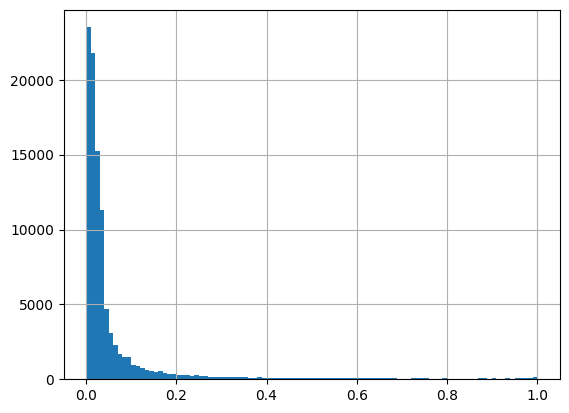

In [118]:
 # Builds a histogram of prediction probabilities
raw_df.prediction_proba.hist(bins=100) 

Let's shift the classification threshold to 0.1-0.2, and this would improve the F1 score

In [119]:
raw_df['prediction_0.2'] = raw_df.prediction_proba > 0.2

In [120]:
f1_score(raw_df.target, raw_df['prediction_0.2'])

0.5160378060578998

In [121]:
confusion_matrix(raw_df.target, raw_df['prediction_0.2'])  

array([[90030,  3932],
       [ 2571,  3467]], dtype=int64)

We can also separately investigate the issues where we make false positive and false negative predictions

In [122]:
# Create a column 'error' that shows whether the prediction is incorrect
raw_df['error'] = raw_df.target != raw_df['prediction_0.2']  

False negative results can be obtained in the following way:

In [124]:
raw_df[raw_df.error & raw_df.target==1].head(5)

,qid,question_text,target,prediction,prediction_proba,prediction_0.2,error
691951,8786fa2e795d2d0e1440,Is Yahoo owned by the Jews?,1,0,0.168228,False,True
1057714,cf41b3cc824bdc767b4b,"If Macedonia is supposedly ""purely"" Greek and ...",1,0,0.027370,False,True
30882,0609338dee541a017b5f,Could the numerous acts of arms being severed ...,1,0,0.025877,False,True
908188,b1f5208e0f44556a5964,Should plus-size women wear dresses and skirts...,1,0,0.124352,False,True
933912,b704f07087d87705b434,Why do we constantly get questions from gun-gr...,1,0,0.141675,False,True


It will also be useful to perform an analysis of feature importance here. Words like `black`, `white`, `jews` are likely to contribute well to predicting that the question is non-ecological.

In [127]:
feature_importance = pd.Series(model.coef_[0], index=vectorizer.get_feature_names_out(), name='imp').sort_values(ascending=False)
feature_importance

liber      2.476723
rape       2.372879
muslim     2.289430
obama      2.228469
atheist    1.909110
             ...   
food      -1.149464
appli     -1.222982
affect    -1.252163
2017      -1.424616
?         -2.339846
Name: imp, Length: 1000, dtype: float64

In [128]:
feature_importance[:10]

liber       2.476723
rape        2.372879
muslim      2.289430
obama       2.228469
atheist     1.909110
sister      1.844614
democrat    1.834214
jew         1.829066
trump       1.800285
gay         1.789882
Name: imp, dtype: float64

And conversely, these words reduce the likelihood that the question is non-ecological/toxic:

In [129]:
feature_importance[-10:]

situat    -1.015553
tv        -1.027773
refer     -1.043746
account   -1.051945
career    -1.104952
food      -1.149464
appli     -1.222982
affect    -1.252163
2017      -1.424616
?         -2.339846
Name: imp, dtype: float64

# TF-IDF

Another method of vectorization.

TF-IDF (Term Frequency - Inverse Document Frequency) is a way to determine the importance of a word in a text, particularly in a set of texts (documents). 

1. **Term Frequency (TF)**: This is the frequency with which a word appears in the text

2. **Inverse Document Frequency (IDF)**: This is a measure that indicates how rare a word is across all documents

3. **TF-IDF**: Combines both measures — TF and IDF — to find words that frequently appear in a specific document but rarely in others. Such words are considered more important for understanding the content of a specific document.

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

tfidf_vectorizer.fit(raw_df.question_text)

In [136]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [138]:
inputs = tfidf_vectorizer.transform(raw_df.question_text)

In [139]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, raw_df.target,
                                                                        test_size=0.3, random_state=42)

### Train Logistic Regression model using TF-IDF

In [140]:
model = LogisticRegression(max_iter=MAX_ITER, solver='sag')
model.fit(train_inputs, train_targets)

LogisticRegression(max_iter=1000, solver='sag')

In [141]:
train_preds = model.predict(train_inputs)

In [142]:
pd.Series(train_preds).value_counts()

0    68378
1     1622
Name: count, dtype: int64

In [143]:
pd.Series(train_targets).value_counts()

target
0    65784
1     4216
Name: count, dtype: int64

In [144]:
accuracy_score(train_targets, train_preds)

0.9493714285714285

In [145]:
f1_score(train_targets, train_preds)

0.3929427886262419

In [146]:
val_preds = model.predict(val_inputs)

In [147]:
accuracy_score(val_targets, val_preds)

0.947

In [148]:
f1_score(val_targets, val_preds)

0.3695479777954005

### Advantages of TF-IDF over Bag of Words

In BoW, we simply count how many times each word appears in the text. However, this method has several limitations:

1. **Ignores the importance of words**: In BoW, all words have the same weight, regardless of how often they appear in different documents. For example, the words "and", "in", "or" will be considered as important as the key words of the document.

2. **Does not take into account the overall frequency of the word**: In BoW, we do not consider whether a word appears frequently in many documents, and therefore it may not carry significant semantic weight.

**TF-IDF** addresses these issues by adding weight to words based on their frequency in a specific document and rarity across the entire set of documents. This makes TF-IDF more effective for highlighting important words and reducing the significance of commonly used words that do not carry much semantic load.

### Example comparing BoW and TF-IDF

Let's look at an example to see the difference between these two methods.

In [149]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Наші документи (тексти)
documents = [
    "the car works very well"
    "machine and man work together",
    "a man drives a car"
]

# Використання мішка слів (BoW)
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(documents)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Використання TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Виведення результатів
print("Bag of Words (BoW):")
display(bow_df.round(2))

print("\nTF-IDF:")
tfidf_df.round(2)

Bag of Words (BoW):


,and,car,drives,man,the,together,very,wellmachine,work,works
0,1,1,0,1,1,1,1,1,1,1
1,0,1,1,1,0,0,0,0,0,0



TF-IDF:


,and,car,drives,man,the,together,very,wellmachine,work,works
0,0.35,0.25,0.0,0.25,0.35,0.35,0.35,0.35,0.35,0.35
1,0.00,0.50,0.7,0.50,0.00,0.00,0.00,0.00,0.00,0.00


### Results

1. **Bag of Words (BoW)** matrix will show the number of times each word appears in each document. For example, the word "car" may have a value of 1 or 2 in different documents, regardless of its frequency across all documents.

2. **TF-IDF** matrix will show the weight of each word, where high values indicate that the word is important for a specific document but rarely appears in other documents. This allows for a better understanding of which words are truly significant for each document.

Thus, we can prioritize TF-IDF in some tasks, as this method highlights key words and helps to better understand text data, taking into account not only word frequency but also their significance.